Привет, Даниель! Как дела?) ☺️
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение. Вот что можно добавить:
    
* Описание целей и задачи проекта
* Описание данных
* План работы
</div>

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import time

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Правильное решение — выделять отдельную ячейку в начале проекта под подключение библиотек и настройки. Tак код легче поддерживать 👌 Но также стоит соблюдать рекомендации PEP-8 при написании кода. У импортов есть тоже определенные правила. Это сделано для повышения читабельности и простоты работы с кодом.

https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</div>

In [2]:
data = pd.read_csv('/datasets/autos.csv')

In [3]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


</b>Вывод по загрузке данных</b></p>
- Представлены данные по 354369 объявлений о продаже автомобилей;
- данные содержат пропуски, а также заведомо некорректные значения, выбросы и нулевые в частности по годам, мощности, цене.<b>Представленные данные требуют предобработки.</b>
- Данные содержат в т.ч. информацию, не связанную со стоимостью автомобилей: DateCrawled, DateCreated, PostalCode, LastSeen, NumberOfPictures, т.к. являются технической информацией об объявлении о продаже/продавце и не характеризуют автомобиль.


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ты хорошо владеешь методами первичного анализа данных 👍 Спасибо за информативный вывод)
</div>

Предобработка данных

In [6]:
#выведем распределение по числовым значениям таблицы
'''columns_numeric = ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth', 'NumberOfPictures']

fig, axes = plt.subplots(3, 2, figsize=(15, 22))
for column, ax in zip(columns_numeric, axes.ravel()):
    if column == 'RegistrationYear':
        plt.ylim(5000)
        plt.title(column)
    else:
        plt.title(column)
    sns.distplot(data[column], ax=ax)'''

"columns_numeric = ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth', 'NumberOfPictures']\n\nfig, axes = plt.subplots(3, 2, figsize=(15, 22))\nfor column, ax in zip(columns_numeric, axes.ravel()):\n    if column == 'RegistrationYear':\n        plt.ylim(5000)\n        plt.title(column)\n    else:\n        plt.title(column)\n    sns.distplot(data[column], ax=ax)"

<AxesSubplot:>

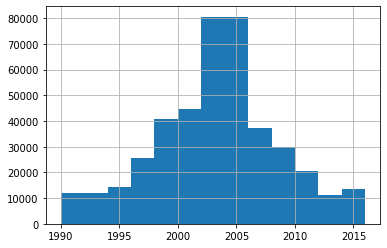

In [7]:
#посмотрим поближе пик автомобилей по году регистрации
data['RegistrationYear'].hist(bins=(1990,1994,1996,1998,2000,2002,2006,2008,2010,2012,2014,2016))

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Над самой визуализацией стоит чуть поработать:
1. Стоит подписать названия осей X и Y.
2. Также стоит дать название графику.
3. Технические комментарии типа ` AxesSubplot:xlabel='datetime' ` стоит убирать: это можно сделать, поставив точку с запятой в последней строке кода в блоке визуализации, либо написать `plt.show()`.
        
Несколько таких нехитрых приёмов очень повысят ценность твоей визуализации:)
        
Будет здорово, если ты учтёшь эти комментарии для всех графиков в твоей работе.
</div>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe4f3591af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe4f35231f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe4f3591790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4f35238b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4f3523c10>],
 'means': []}

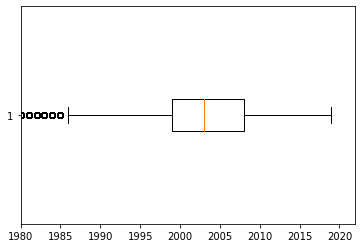

In [8]:
plt.xlim([1980,2022])
plt.boxplot(data['RegistrationYear'], vert=False)

<AxesSubplot:>

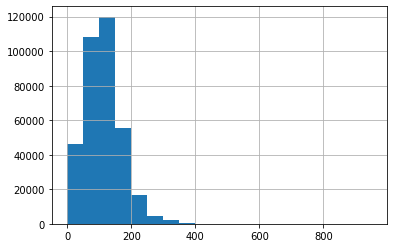

In [9]:
# closer look at Power feature
data['Power'].hist(bins=range(0,1000,50))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe4f34678b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe4f3474160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe4f345c7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4f3474ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4f3474e20>],
 'means': []}

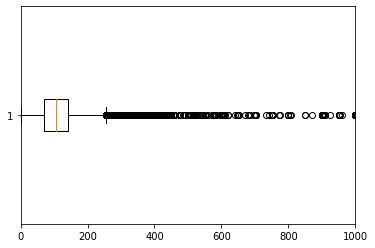

In [10]:
plt.xlim([0,1000])
plt.boxplot(data['Power'], vert=False)

- Cтолбец NumberOfPictures заполнен нулями и очевидно некорректно выгружен, либо на момент выгрузки данный признак является вновь созданным и как следствие не заполнен
- По столбцу RegistrationMonth данные распределены примерно равномерно. Очевидно данный столбец мало либо совсем не влияет на стоимость автомобиля, т.к. принципиальным является год выпуска.
- По столбцам RegistarationYear  и Power очевидно имеются некорректно заведенные значения. Предлагается год регистрации более 2020 и менее 1980 отсечь по причине незначительности таких объявлений. Верятно индивидуального подхода к определению стоимости (коллекционность, сохранность, конкретная серия машины и др.)
- Мощность свыше 300 лошадиных сил также предлагается отсечь ввиду незначительного количества и очевидно индивидуального ценообразования таких моделей.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Аномалии заметили 👍
</div>

In [11]:
data = data[(data['RegistrationYear']>=1980)&(data['RegistrationYear']<=2020)]

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В году регистрации действительно были аномальные значения 👍
</div>

In [12]:
# take a look at underpriced cars
print(len(data.loc[data['Price']<=500]))
data.loc[data['Price']<=500].head(10)

41152


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
16,2016-04-01 12:46:46,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
23,2016-03-12 19:43:07,450,small,1997,manual,50,arosa,150000,5,petrol,seat,no,2016-03-12 00:00:00,0,9526,2016-03-21 01:46:11
24,2016-03-13 20:40:49,500,sedan,1990,manual,118,other,150000,10,petrol,mercedes_benz,yes,2016-03-13 00:00:00,0,35390,2016-03-13 20:40:49
32,2016-03-15 20:59:01,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,2016-03-15 00:00:00,0,44145,2016-03-17 18:17:43
35,2016-03-08 07:54:46,350,NaN,2016,manual,75,golf,150000,4,petrol,volkswagen,no,2016-03-08 00:00:00,0,19386,2016-03-08 09:44:50
40,2016-03-26 22:06:17,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
59,2016-03-29 15:48:15,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,NaN,2016-03-29 00:00:00,0,53721,2016-04-06 01:44:38
60,2016-03-26 07:54:29,200,coupe,1995,manual,102,3er,150000,4,petrol,bmw,NaN,2016-03-26 00:00:00,0,23560,2016-04-01 20:46:51


In [13]:
# очевидно что по недооцененным машинам скорее всего ошибочно заведена цена
# поскольку это целевой признак предлагается такие машины удалить т.к. заполняя по какой либо логике мы допустим утечку целевого прзнака
data =data.drop(data[data['Price']<=500].index,axis=0)
data[data['Price']<=500]


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данных остались машины только с адекватной ценой 👍
</div>

In [14]:
# take a look at zero power cars
data.loc[data['Power']<30].head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
37,2016-03-28 17:50:15,1500,NaN,2016,NaN,0,kangoo,150000,1,gasoline,renault,no,2016-03-28 00:00:00,0,46483,2016-03-30 09:18:02
54,2016-03-17 07:56:40,4700,wagon,2005,manual,0,signum,150000,0,NaN,opel,no,2016-03-17 00:00:00,0,88433,2016-04-04 04:17:32
55,2016-03-26 10:39:35,550,wagon,1999,manual,0,astra,150000,8,gasoline,opel,yes,2016-03-26 00:00:00,0,56759,2016-04-01 23:17:27
69,2016-04-01 11:56:40,1200,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN,2016-04-01 00:00:00,0,47249,2016-04-07 08:46:07
70,2016-03-08 01:36:42,800,small,1993,manual,0,polo,150000,3,petrol,volkswagen,no,2016-03-08 00:00:00,0,8258,2016-04-05 23:46:00
90,2016-03-23 11:53:21,2400,sedan,2003,manual,0,a4,150000,9,gasoline,audi,NaN,2016-03-23 00:00:00,0,40210,2016-03-23 11:53:21
94,2016-03-28 16:37:43,8390,NaN,2009,NaN,0,insignia,150000,0,NaN,opel,NaN,2016-03-28 00:00:00,0,29221,2016-03-30 07:44:59
98,2016-03-11 19:00:25,4290,bus,2008,manual,0,combo,150000,2,gasoline,opel,no,2016-03-11 00:00:00,0,23568,2016-04-05 22:45:32
126,2016-03-20 10:54:17,8000,NaN,2009,manual,0,golf,100000,10,petrol,volkswagen,no,2016-03-20 00:00:00,0,94139,2016-04-06 07:45:51
130,2016-03-20 18:47:31,3390,NaN,2000,NaN,0,3er,150000,2,NaN,bmw,NaN,2016-03-20 00:00:00,0,45739,2016-03-28 19:48:42


In [15]:
data.Model.value_counts()

golf                  25670
other                 20208
3er                   18189
polo                  10231
corsa                  9465
                      ...  
elefantino                6
samara                    5
rangerover                4
serie_2                   3
range_rover_evoque        2
Name: Model, Length: 248, dtype: int64

In [16]:
#предлагается убрать записи по которым отсутствует модель машины
print("доля записей с пустым значением Модель",len(data[data.Model.isna()])/len(data))
data =data.drop(data[data.Model.isna()].index,axis=0)

доля записей с пустым значением Модель 0.04370600012917393


In [17]:
print("доля записей с пустым значением Кузов",len(data[data.VehicleType.isna()])/len(data))
data.VehicleType.value_counts()

доля записей с пустым значением Кузов 0.07416437597509168


sedan          80664
small          63874
wagon          58017
bus            26686
convertible    18364
coupe          13437
suv            10861
other           2261
Name: VehicleType, dtype: int64

In [18]:
# take a look at NAN at vehicle type
nan_types = 0
nan_types = pd.DataFrame(data[data.VehicleType.isna()].groupby('Model')['Price'].count().reset_index())
nan_types.columns = ('Model','Nan_Qty')
def countmodel (model):
    #print (model)
    return len(data[data['Model']==model])
nan_types['total']=nan_types['Model'].apply(countmodel)
nan_types['Nan_ratio'] = nan_types['Nan_Qty']/nan_types['total']
nan_types.sort_values(by = 'Nan_ratio',ascending=False)

,Model,Nan_Qty,total,Nan_ratio
125,kalina,3,8,0.375000
124,kaefer,50,145,0.344828
187,serie_2,1,3,0.333333
92,elefantino,2,6,0.333333
171,rangerover,1,4,0.250000
...,...,...,...,...
229,yeti,3,174,0.017241
180,s_type,2,122,0.016393
83,crossfire,1,64,0.015625
231,z_reihe,10,706,0.014164


In [19]:
#Предлагается заполнять пропуски категориальных признаков самым часто встречающимся для данной модели значением
def apply_type(string,feature, TypeCounter):
    return TypeCounter.loc[TypeCounter['Model']==string, feature].item()
def mostly_type(feature):
    #создаем таблицу с количеством повторений значений необходимого признака для всех моделей
    TypeCounter = pd.DataFrame(data.groupby(['Model',feature])['Model'].count().sort_values(ascending=False))
    #удаляем столбец с количеством и оставляем только первые, они же максимальные значения
    TypeCounter = TypeCounter.drop('Model',axis=1).reset_index()
    TypeCounter = TypeCounter.drop_duplicates('Model',keep='first')
    data.loc[data[feature].isna(),feature]=data.loc[data[feature].isna(),'Model'].apply(apply_type,feature=feature, TypeCounter = TypeCounter)



In [20]:
mostly_type('VehicleType')

In [21]:
data.loc[data['Model']=='passat','VehicleType'].value_counts(dropna=False)

wagon          7130
sedan          2003
coupe           180
bus               5
small             5
suv               3
other             2
convertible       1
Name: VehicleType, dtype: int64

In [22]:
# удалим машины со значением мощности более 300
data = data.drop(data[data['Power']>300].index,axis=0)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Мощность ограничили 👍
</div>

In [23]:
# значения мощности менее 30 являются нулевыми. 
#Т.е. имеет место ошибка заведения. 
#Поскольку поле числовое предлагается заполнить медианным значением для каждой марки
#сделаем таблицу медианных значений
median_power = data.groupby('Model')['Power'].median()
#print(type(median_power))
def get_power (model):
    return median_power[model]
data.loc[(data['Power']==0),'Power'] = data.loc[data['Power']==0,'Model'].apply(get_power)

In [24]:
data[data.Power==0].head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen


In [25]:
data['NotRepaired'].value_counts(dropna=False)

no     224000
NaN     46327
yes     22836
Name: NotRepaired, dtype: int64

In [26]:
#пропуски по колонке NotRepaired предлагается заполнить значением 'NO' поскольку очевидно 
# что о таком преимуществе продавец старается не забывать упомянуть
data['NotRepaired']=data['NotRepaired'].fillna('no')

In [27]:
data['NotRepaired'].value_counts(dropna=False)

no     270327
yes     22836
Name: NotRepaired, dtype: int64

In [28]:
data['FuelType'].value_counts(dropna=False)

petrol      177493
gasoline     92730
NaN          17670
lpg           4422
cng            510
hybrid         201
other           79
electric        58
Name: FuelType, dtype: int64

In [29]:
#заполним пропуски по столбцу ТипТоплива наиболее часто встречаемыми для каждой модели значениями
mostly_type('FuelType')

In [30]:
#заполним пропуски по столбцу ТипТоплива наиболее часто встречаемыми для каждой модели значениями
mostly_type('Gearbox')

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Пропуски успешно заполнены 👍 Модели теперь не будут капризничать)
</div>

In [31]:
#проверим дубликаты
data.duplicated().sum()

5

In [32]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

От явных дубликатов избавились 👍 После удаления неинформативных признаков тоже стоит проверить данные на наличие дубликатов
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

К неявным дубликатам относятся названия модели 'rangerover' и 'range_rover'
</div>

In [33]:
data = data.drop(['RegistrationMonth','DateCrawled', 'LastSeen', 'DateCreated', 'NumberOfPictures', 'PostalCode'], axis=1)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293158 entries, 0 to 293157
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             293158 non-null  int64  
 1   VehicleType       293158 non-null  object 
 2   RegistrationYear  293158 non-null  int64  
 3   Gearbox           293158 non-null  object 
 4   Power             293158 non-null  float64
 5   Model             293158 non-null  object 
 6   Kilometer         293158 non-null  int64  
 7   FuelType          293158 non-null  object 
 8   Brand             293158 non-null  object 
 9   NotRepaired       293158 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 22.4+ MB


<b>Вывод по предобработке</b> </p>по результатам предобработки заполнены пропуски и отброшены заведомо некорректные данные а также выбросы, которые могли исказить модель. Осталось 9 признаков признанных влияющими на стоимость машини и 293 тыс.объявлений или 83% исходных данных. По оставшимся для дальнейшего анализа объявлениям все данные имелись изначально либо заполнены медианными, либо наиболее свойственными (в случае с категориальными) для каждой модели значениями.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

## Обучение моделей

Предлагается обучить и посмотреть результаты для моделей:
- Линейная регрессия
- Случайный лес
- CatBoost (широко обсуждается на форумах)
- Light RGBM (применение библиотеки предусмотрено техзаданием)


Для модели "Линейная регрессия", "случайный лес" требуется кодирование категориальных признаков. Остальные модели не нуждаются в кодировании, но рекомендуется перевести категориальные признаки к типу category.</p>
Для всех моделей предполагается обучение с кросс валидацией встроенными инструментами либо GridSearchCV. В связи с чем база делится на обучающую и тестовую выборки без выделения валидационной.

In [35]:
#создадим функцию для оценки качества моделей по RMSE
def rmse_score (target, predictions):
    rmse = mean_squared_error(target, predictions)**0.5
    return rmse
scorer = make_scorer(rmse_score, greater_is_better=False)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Хороший помощник 👍
</div>

<b>Формирование выборок</b>

In [36]:
# проведем кодирование категориальных признаков для обучения линейной регрессии
data_ohe = pd.get_dummies(data, drop_first=True)
target_ohe = data_ohe['Price']
features_ohe = data_ohe.drop('Price', axis=1)

#случайного леса
category_encoder = OrdinalEncoder()
data_oe = data.copy()
categories = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
data_oe[categories] = category_encoder.fit_transform(data_oe[categories])
target_oe = data_oe['Price']
features_oe = data_oe.drop('Price', axis=1)


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Молодец, что для различных моделей используешь различные методы кодирования 👍
</div>

In [37]:
#сформируем выборки для линейной регрессии
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features_ohe, target_ohe, test_size=0.2, random_state = 12345)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

In [38]:
# проведем масштабирование признаков для обучения линейной регрессии
numeric = ['RegistrationYear', 'Power', 'Kilometer']
scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])

features_train_ohe.loc[:,numeric] = scaler.transform(features_train_ohe[numeric])
features_test_ohe.loc[:,numeric] = scaler.transform(features_test_ohe[numeric])


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отлично, признаки масштабированы 👍 Не забыли, что fit нужно делать только на train выборке.
</div>

In [39]:
#сформируем выборку для случайного леса
features_train_oe, features_test_oe, target_train_oe, target_test_oe = train_test_split(features_oe, target_oe, test_size=0.2, random_state = 12345)

In [40]:
#Для остальных моделей кодирование не требуется. рекомендуется привести категориальные признаки к типу 'category'
data_cat = data
for _ in data_cat.columns:
        feature_type = data_cat[_].dtype
        if feature_type == 'object':
            data_cat[_] = data_cat[_].astype('category')

In [41]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293158 entries, 0 to 293157
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Price             293158 non-null  int64   
 1   VehicleType       293158 non-null  category
 2   RegistrationYear  293158 non-null  int64   
 3   Gearbox           293158 non-null  category
 4   Power             293158 non-null  float64 
 5   Model             293158 non-null  category
 6   Kilometer         293158 non-null  int64   
 7   FuelType          293158 non-null  category
 8   Brand             293158 non-null  category
 9   NotRepaired       293158 non-null  category
dtypes: category(6), float64(1), int64(3)
memory usage: 10.9 MB


In [42]:
#формируем выборки для моделей CatBoost и LightGBM
features_train_cat, features_test_cat, target_train_cat, target_test_cat = train_test_split(data_cat.drop('Price',axis=1),data_cat['Price'], test_size=0.2, random_state = 12345)

<b>Обучение</b>

In [43]:
#Линейная регрессия
model_regre = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
searcher = GridSearchCV(model_regre, parameters, cv=3, scoring=scorer, verbose=1)
searcher.fit(features_train_ohe, target_train_ohe)
print("Наилучшие параметры для модели линейной регрессии RMSE-", searcher.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Наилучшие параметры для модели линейной регрессии RMSE- -2585.301617299685


In [44]:
print('гиперпараметры -', searcher.best_params_)

гиперпараметры - {'fit_intercept': True, 'normalize': True}


In [45]:
#Случайный лес
# n_estimators менее 100 неактуально, возьмем от 200 и до 500 деревьев
# max_depth при 9 признаках более 10 будет приводить к переобучению. Менее 7 не имеет смысла, т.к. признаки не будут рассмотрены.

model_forest = RandomForestRegressor(random_state=12345)
parameters_forest = {'n_estimators': range(200, 501, 50),
                 'max_depth': range(7,11)}
searcher_forest = GridSearchCV(model_forest, parameters_forest,
                         cv=5, verbose=5, scoring=scorer)

searcher_forest.fit(features_train_oe, target_train_oe)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END ..................max_depth=7, n_estimators=200; total time=  30.3s
[CV 2/5] END ..................max_depth=7, n_estimators=200; total time=  30.9s
[CV 3/5] END ..................max_depth=7, n_estimators=200; total time=  31.5s
[CV 4/5] END ..................max_depth=7, n_estimators=200; total time=  30.7s
[CV 5/5] END ..................max_depth=7, n_estimators=200; total time=  30.3s
[CV 1/5] END ..................max_depth=7, n_estimators=250; total time=  37.8s
[CV 2/5] END ..................max_depth=7, n_estimators=250; total time=  37.7s
[CV 3/5] END ..................max_depth=7, n_estimators=250; total time=  38.1s
[CV 4/5] END ..................max_depth=7, n_estimators=250; total time=  38.6s
[CV 5/5] END ..................max_depth=7, n_estimators=250; total time=  38.2s
[CV 1/5] END ..................max_depth=7, n_estimators=300; total time=  46.1s
[CV 2/5] END ..................max_depth=7, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(7, 11),
                         'n_estimators': range(200, 501, 50)},
             scoring=make_scorer(rmse_score, greater_is_better=False),
             verbose=5)

In [46]:
'''print("Наилучший результат для модели случайного леса RMSE-", searcher_forest.best_score_)
print("Наилучшие параметры для модели случайного леса -", searcher_forest.best_params_)'''

Наилучший результат для модели случайного леса RMSE- -1851.937016587858
Наилучшие параметры для модели случайного леса - {'max_depth': 10, 'n_estimators': 400}


Наилучший результат для модели случайного леса RMSE- -1851.937016587858
Наилучшие параметры для модели случайного леса - {'max_depth': 10, 'n_estimators': 400}

In [47]:
#обучим модель CatBoost категориальные признаки для данной модели не нужно преобразовывать достаточно передать перечень
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
model_cat = CatBoostRegressor(cat_features=cat_features, loss_function="RMSE")
#model_cat.fit(features_train_cat, target_train_cat,verbose=5)
parameters_cat = {'learning_rate': [0.05,0.3, 0.5, 0.8],
        'iterations': [50, 150, 500]}

searcher_cat = GridSearchCV(model_cat, parameters_cat,
                         cv=5, verbose=5, scoring=scorer)

searcher_cat.fit(features_train_cat, target_train_cat)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0:	learn: 4326.0896000	total: 123ms	remaining: 6.01s
1:	learn: 4185.8329747	total: 189ms	remaining: 4.53s
2:	learn: 4058.8591856	total: 243ms	remaining: 3.81s
3:	learn: 3933.2676078	total: 299ms	remaining: 3.43s
4:	learn: 3821.1616877	total: 351ms	remaining: 3.16s
5:	learn: 3709.4084285	total: 405ms	remaining: 2.97s
6:	learn: 3606.4763073	total: 469ms	remaining: 2.88s
7:	learn: 3513.3929128	total: 523ms	remaining: 2.75s
8:	learn: 3424.2355543	total: 580ms	remaining: 2.64s
9:	learn: 3339.2084239	total: 632ms	remaining: 2.53s
10:	learn: 3258.7946483	total: 686ms	remaining: 2.43s
11:	learn: 3184.7653304	total: 740ms	remaining: 2.34s
12:	learn: 3114.0709199	total: 792ms	remaining: 2.25s
13:	learn: 3045.9399808	total: 846ms	remaining: 2.17s
14:	learn: 2984.8097859	total: 902ms	remaining: 2.1s
15:	learn: 2925.7837139	total: 954ms	remaining: 2.03s
16:	learn: 2871.2813839	total: 1.01s	remaining: 1.96s
17:	learn: 2820.1958846	total: 1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



371:	learn: 1460.9942463	total: 46.7s	remaining: 16.1s
372:	learn: 1460.8476991	total: 46.8s	remaining: 15.9s
373:	learn: 1460.7410710	total: 46.9s	remaining: 15.8s
374:	learn: 1460.4741181	total: 47s	remaining: 15.7s
375:	learn: 1460.3086372	total: 47.2s	remaining: 15.6s
376:	learn: 1459.9882921	total: 47.3s	remaining: 15.4s
377:	learn: 1459.6560583	total: 47.4s	remaining: 15.3s
378:	learn: 1459.3728505	total: 47.6s	remaining: 15.2s
379:	learn: 1459.2128496	total: 47.7s	remaining: 15.1s
380:	learn: 1458.9568350	total: 47.8s	remaining: 14.9s
381:	learn: 1458.8629431	total: 47.9s	remaining: 14.8s
382:	learn: 1458.8157326	total: 48s	remaining: 14.7s
383:	learn: 1458.7110614	total: 48.1s	remaining: 14.5s
384:	learn: 1458.5448926	total: 48.3s	remaining: 14.4s
385:	learn: 1458.4807857	total: 48.4s	remaining: 14.3s
386:	learn: 1457.9717675	total: 48.5s	remaining: 14.2s
387:	learn: 1457.8075680	total: 48.6s	remaining: 14s
388:	learn: 1457.5529427	total: 48.8s	remaining: 13.9s
389:	learn: 1457

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fe4f33ae5b0>,
             param_grid={'iterations': [50, 150, 500],
                         'learning_rate': [0.05, 0.3, 0.5, 0.8]},
             scoring=make_scorer(rmse_score, greater_is_better=False),
             verbose=5)

In [48]:
print("Наилучший результат для модели CatBOOST RMSE-", searcher_cat.best_score_)
print("Наилучшие параметры для модели CatBOOST -", searcher_cat.best_params_)

Наилучший результат для модели CatBOOST RMSE- -1565.871712951563
Наилучшие параметры для модели CatBOOST - {'iterations': 500, 'learning_rate': 0.5}


In [49]:
#Обучим модель LGBMRegressor
model_lgbm = LGBMRegressor(random_state=12345)
    
parameters_lgbm = {'n_estimators': [500],
              'num_leaves': [32], 
              'learning_rate':[.1, 0.5]}

searcher_lgbm = GridSearchCV(model_lgbm, parameters_lgbm,
                         cv=5, verbose=5, scoring=scorer)

searcher_lgbm.fit(features_train_cat, target_train_cat)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END learning_rate=0.1, n_estimators=500, num_leaves=32; total time= 3.5min
[CV 2/5] END learning_rate=0.1, n_estimators=500, num_leaves=32; total time=  17.7s
[CV 3/5] END learning_rate=0.1, n_estimators=500, num_leaves=32; total time=  44.0s
[CV 4/5] END learning_rate=0.1, n_estimators=500, num_leaves=32; total time=  16.6s
[CV 5/5] END learning_rate=0.1, n_estimators=500, num_leaves=32; total time=  16.2s
[CV 1/5] END learning_rate=0.5, n_estimators=500, num_leaves=32; total time=  13.9s
[CV 2/5] END learning_rate=0.5, n_estimators=500, num_leaves=32; total time=  15.2s
[CV 3/5] END learning_rate=0.5, n_estimators=500, num_leaves=32; total time=  14.3s
[CV 4/5] END learning_rate=0.5, n_estimators=500, num_leaves=32; total time=  14.8s
[CV 5/5] END learning_rate=0.5, n_estimators=500, num_leaves=32; total time=  14.6s


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=12345),
             param_grid={'learning_rate': [0.1, 0.5], 'n_estimators': [500],
                         'num_leaves': [32]},
             scoring=make_scorer(rmse_score, greater_is_better=False),
             verbose=5)

In [50]:
print("Наилучший результат для модели LightGBM Regressor RMSE-", searcher_lgbm.best_score_)
print("Наилучшие параметры для модели LightGBM Regressor -", searcher_lgbm.best_params_)

Наилучший результат для модели LightGBM Regressor RMSE- -1524.4752261413098
Наилучшие параметры для модели LightGBM Regressor - {'learning_rate': 0.1, 'n_estimators': 500, 'num_leaves': 32}


<b>Вывод</b>
Обучены и подобраны оптимальные параметры для 4 моделей: линейная регрессия, CatBoost, LightGBM. 
Для "примерки" гиперпараметров и оценки моделей применялся метод GridSearchCV.

Результаты расположились следующим образом:
- Линейная регрессия - 2585
- Случайный лес - 1851
- CatBOOST_Regressor - 1565
- LightGBM_Regressor - 1524</p>
<p>Очевидно что применение градиентного спуска и бустинга в рамках поставленной задачи дает лучшие результаты метрики.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

По модельной части замечаний нет - все сделано четко 💪
</div>

## Анализ моделей

In [51]:
# Сложим результаты в таблицу для наглядного представления
timers_metrics = pd.DataFrame(columns = ['model_name','RMSE','learn_time','work_time'])

In [52]:
# объединим процедуры расчета метрик, тайминга и логирования результатов
def learn_and_job (model, features_train, target_train, features_test, target_test):
    learn_time = time.time()
    model.fit(features_train, target_train)
    learn_time = time.time() - learn_time
    
    
    work_time = time.time()
    predictions = model.predict(features_test)
    work_time = time.time()-work_time
        
    rmse = mean_squared_error(target_test, predictions)**0.5
    timers_metrics.loc[len(timers_metrics)]=[type(model).__name__,rmse,learn_time,work_time]

In [53]:
#Линейная регрессия
model_regre = LinearRegression(fit_intercept = True, normalize = True)
learn_and_job(model_regre, features_train_ohe, target_train_ohe, features_test_ohe, target_test_ohe)

In [56]:
#Случайный лес
model_forest = RandomForestRegressor(random_state=12345, max_depth = 10, n_estimators = 400)
learn_and_job(model_forest, features_train_oe, target_train_oe, features_test_oe, target_test_oe)

In [68]:
#CatBOOSTRegressor
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
model_cat = CatBoostRegressor(cat_features=cat_features, loss_function="RMSE", learning_rate=0.5, iterations=500, silent=True)
learn_and_job(model_cat, features_train_cat, target_train_cat, features_test_cat, target_test_cat)

In [69]:
#LightGBMRegressor
model_lgbm = LGBMRegressor(random_state=12345,learning_rate = 0.1, n_estimators = 500, num_leaves = 32)
learn_and_job(model_lgbm, features_train_cat, target_train_cat, features_test_cat, target_test_cat)

In [73]:
#Результаты работы моделей с тестовой выборкой на ранее отработанных гиперпараметрах
timers_metrics

,model_name,RMSE,learn_time,work_time
0,LinearRegression,2588.642949,22.778343,0.102812
1,RandomForestRegressor,1856.989671,102.540163,2.050763
2,CatBoostRegressor,1566.358574,82.560841,0.272332
3,LGBMRegressor,1526.560899,16.791814,2.698223


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для сравнения моделей заносишь их в общий датафрейм 👍
</div>

<b>Вывод</b></p>
По результатам обучения и последующего тестирования 4 разных моделей, установлены CatBoosRegressor и LGBMRegressor как показывающие заметно лучшие и сопоставимые результаты в части метрики RMSE, установленной техзаданием.
При этом время обучения LGBMRegressor в 4 раза меньше CatBoostRegressor, но время предсказани/обработки задания у модели CatBoostRegressor в 10 раз меньше чем у LGBMRegressor.
Таким образом две последние модели рекомендуются к использованию в зависимости от фактических условий использования (частота обучения, частота использования).
Учитывая что обучение производится на много порядков реже предсказания, в качестве основной рекомендуется к использованию модель CatBoostRegressor.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует исследованию 👍 Значит рекомендуем заказчику CatBoostRegressor.
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Критических замечаний нет
* Молодец, отличная работа!
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"